In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator


from utils import load_image_mask, get_SAM, generate_masks_for_image, surrounding_ratio_gauss, improve_mask_subtraction
from visualisation import *

In [2]:
sam = get_SAM(type='H')


In [24]:
IDX = 1234 

img, original_mask = load_image_mask(IDX)

In [19]:
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side = 30,
    pred_iou_thresh = 0.85,
    stability_score_thresh= 0.90,
    stability_score_offset= 1,
    box_nms_thresh= 0.7,
    crop_n_layers= 0,
    crop_nms_thresh=0.7,
    crop_overlap_ratio=512/1500,
    crop_n_points_downscale_factor= 1,
    point_grids= None,
    min_mask_region_area= 10
) 
'''
sIOU = 88
SSO
    98: 32
    95: 85
    90: 101
    85: 108

SSO = 95
sIOU
    99: 12
    95: 77
    93: 83
    90: 86
    88: 101
    85: 115
    83: 116
    80: 123
'''

'\nsIOU = 88\nSSO\n    98: 32\n    95: 85\n    90: 101\n    85: 108\n\nSSO = 95\nsIOU\n    99: 12\n    95: 77\n    93: 83\n    90: 86\n    88: 101\n    85: 115\n    83: 116\n    80: 123\n'

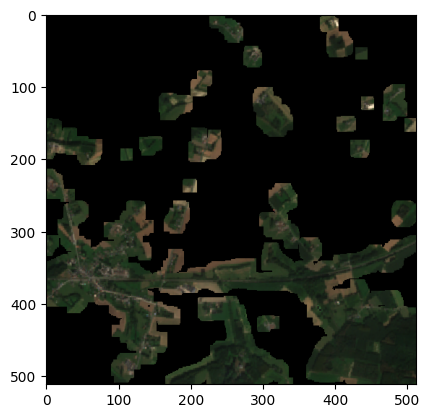

In [25]:
new_image = img.copy()
m = original_mask.copy()
from skimage.filters import gaussian

m = gaussian(m, sigma=2) == 0

new_image[m] = 0
# new_image[original_mask] = np.array([100, 100, 255])

plt.imshow(new_image)

In [26]:
anns = generate_masks_for_image(mask_generator, new_image, original_mask)
print(len(anns))
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# show_anns(anns, ax)

85


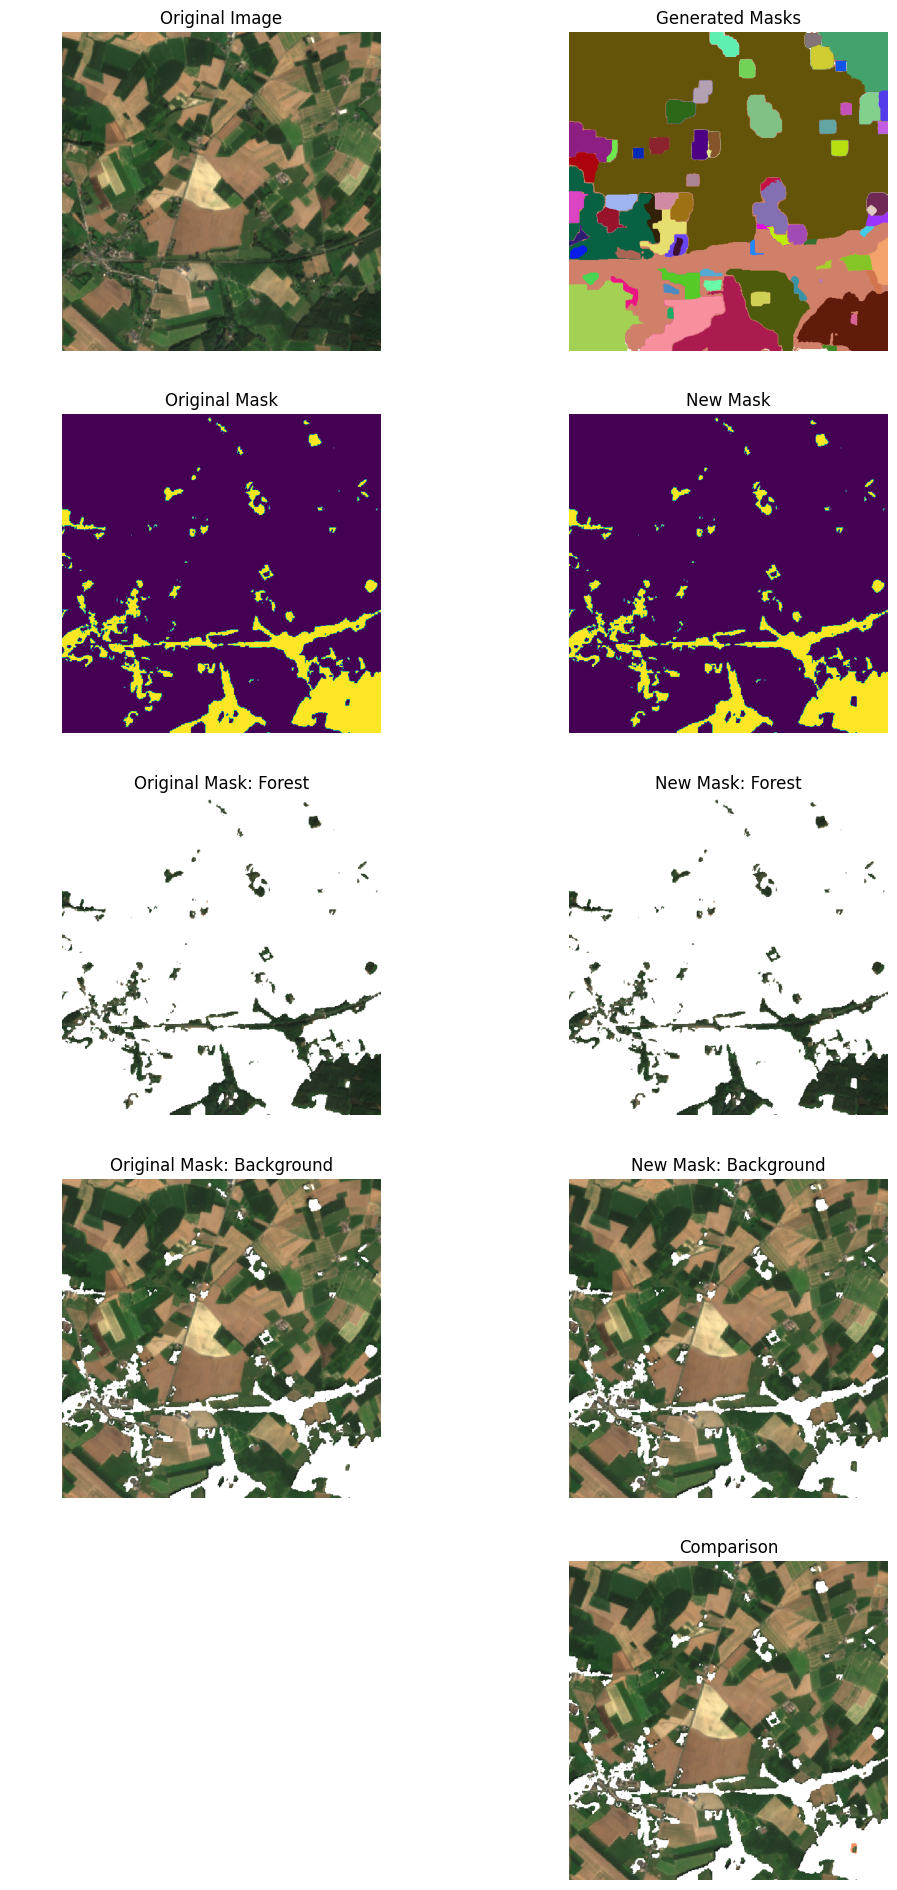

In [28]:
SUBTRACTION_MINIMIM_TREE_SURROUNGING = 0.8
SUBTRACTION_MINIMUM_NON_TREE_FRACTION = 0.3
SIGMA = 2
SIZE_THRESH = 512**2 * 0.05
new_mask = improve_mask_subtraction(anns, 
                        original_mask, 
                        SUBTRACTION_MINIMIM_TREE_SURROUNGING,
                        SUBTRACTION_MINIMUM_NON_TREE_FRACTION, 
                        SIZE_THRESH,
                        SIGMA
)

show_results(img, original_mask, anns, new_mask, intensity=1.5)

In [21]:
plt.close('all')